In [ ]:
!pip install matplotlib

In [15]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Simulation parameters
number_of_cars = int(input("Enter Number of Cars"))  # Total simulation time in minutes

inter_arrival_times = [0, 1, 2, 3]
inter_arrival_probabilities = [0.17, 0.23, 0.25, 0.35]

categories = ["A", "B", "C"]
category_probabilities = [0.2, 0.35, 0.45]

service_times_A_B = [1, 2, 3]
service_probabilities_A_B = [0.2, 0.3, 0.5]

service_times_C = [3, 5, 7]
service_probabilities_C = [0.2, 0.5, 0.3]

Enter Number of Cars 50


In [4]:
# Initialize variables
i = 0
time = 0
events = []
pump_idle_time = {"95 Octane": 0, "90 Octane": 0, "Gas": 0}
pump_queues = {"95 Octane": [], "90 Octane": [], "Gas": []}
last_pump_free_time = {"95 Octane": 0, "90 Octane": 0, "Gas": 0}

In [5]:
# Generate inter-arrival times and cars

for i in range(number_of_cars):
    inter_arrival = np.random.choice(inter_arrival_times, p=inter_arrival_probabilities)
    time += inter_arrival

    car_category = np.random.choice(categories, p=category_probabilities)

    # Assign service time
    if car_category in ["A", "B"]:
        service_time = np.random.choice(service_times_A_B, p=service_probabilities_A_B)
    else:
        service_time = np.random.choice(service_times_C, p=service_probabilities_C)

    # Determine pump assignment
    if car_category == "B":
        if len(pump_queues["90 Octane"]) > 3:  # More than 3 cars in the "90 Octane" queue
            pump = "95 Octane" if np.random.rand() < 0.6 else "90 Octane"
        else:
            pump = "90 Octane"
    elif car_category == "C":
        if len(pump_queues["Gas"]) > 4:  # More than 4 cars in the "Gas" queue
            pump = "90 Octane" if np.random.rand() < 0.4 else "Gas"
        else:
            pump = "Gas"
    else:  # Category A
        pump = "95 Octane"

    # Calculate waiting time and start/end times

    # if the queue is empty then the waiting time is the service end time of the last one in the pump - the current time
    waiting_time = max(0, last_pump_free_time[pump] - time)

    # if not pump_queues[pump]:
    #     waiting_time = max(0, last_pump_free_time[pump] - time)
    # else:
    #     # cars that came before me - the moment I came
    #     waiting_time = max(0, sum(event["service_time"] for event in pump_queues[pump]) - (time - pump_queues[pump][-1]["arrival_time"]))

    service_start_time = time + waiting_time
    service_end_time = service_start_time + service_time

    # Update idle time for pump
    if service_start_time > last_pump_free_time[pump]:
        pump_idle_time[pump] += service_start_time - last_pump_free_time[pump]

    # Record event
    event = {
        "inter-arrival_time": inter_arrival,
        "arrival_time": time,
        "car_category": car_category,
        "pump": pump,
        "service_time": service_time,
        "service_start_time": service_start_time,
        "service_end_time": service_end_time,
        "waiting_time": waiting_time,
        "cumulative_pump_idle_time": pump_idle_time[pump],
    }
    events.append(event)

    # Update pump state
    pump_queues[pump].append(event)
    last_pump_free_time[pump] = service_end_time


In [6]:
df = pd.DataFrame(events)
df.to_excel("output.xlsx", index=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [26]:
# Display the resulting DataFrame

df_copy = pd.get_dummies(df,columns=['pump'],dtype=np.int64)
df_copy


,inter-arrival_time,arrival_time,car_category,service_time,service_start_time,service_end_time,waiting_time,cumulative_pump_idle_time,pump_90 Octane,pump_95 Octane,pump_Gas
0,1,1,C,7,1,8,0,1,0,0,1
1,2,3,A,1,3,4,0,3,0,1,0
2,0,3,C,5,8,13,5,1,0,0,1
3,3,6,A,3,6,9,0,5,0,1,0
4,3,9,B,1,9,10,0,9,1,0,0
5,1,10,B,3,10,13,0,9,1,0,0
6,2,12,B,3,13,16,1,9,1,0,0
7,0,12,B,2,16,18,4,9,1,0,0
8,2,14,C,3,14,17,0,2,0,0,1
9,2,16,C,3,17,20,1,2,0,0,1


array([[<Axes: title={'center': 'inter-arrival_time'}>,
        <Axes: title={'center': 'arrival_time'}>,
        <Axes: title={'center': 'service_time'}>],
       [<Axes: title={'center': 'service_start_time'}>,
        <Axes: title={'center': 'service_end_time'}>,
        <Axes: title={'center': 'waiting_time'}>],
       [<Axes: title={'center': 'cumulative_pump_idle_time'}>,
        <Axes: title={'center': 'pump_90 Octane'}>,
        <Axes: title={'center': 'pump_95 Octane'}>],
       [<Axes: title={'center': 'pump_Gas'}>, <Axes: >, <Axes: >]],
      dtype=object)

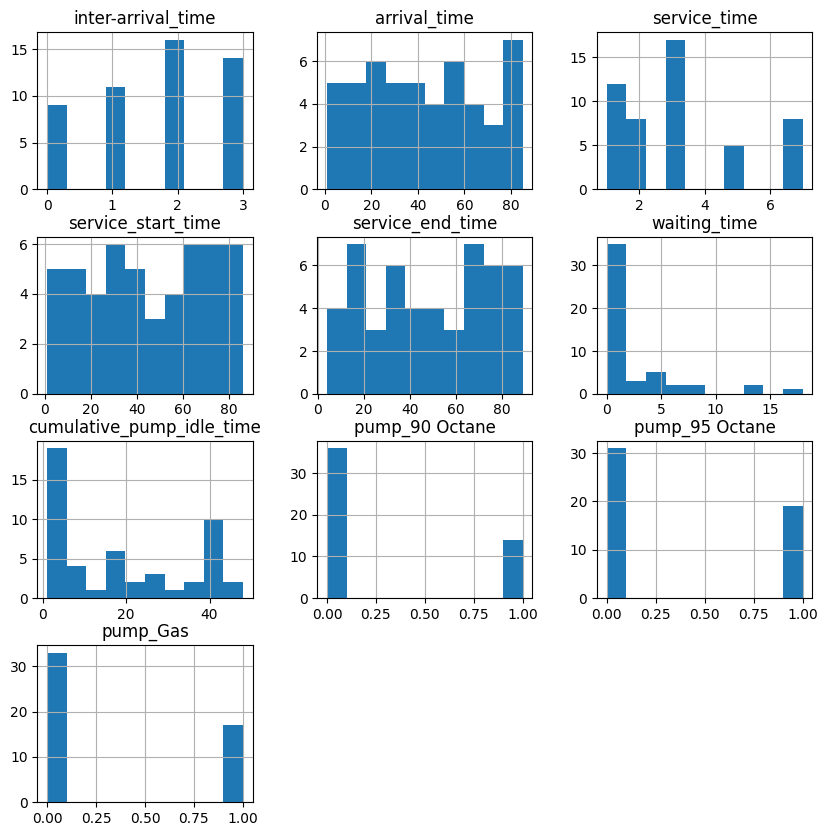

In [27]:
df_copy.hist(figsize=(10, 10))